In [1]:
from dtwhaclustering.dtw_analysis import dtw_signal_pairs, dtw_clustering, plot_signals, shuffle_signals, plot_cluster
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
from dtaidistance import dtw
from scipy.cluster.hierarchy import fcluster

from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering


%matplotlib inline 

import matplotlib
fontsize = 26
# font = {'family': 'Times',
#         'weight': 'bold',
#         'size': fontsize}

# matplotlib.rc('font', **font)
plt.rcParams["figure.figsize"] = (12, 6)
plt.style.use('ggplot')


plt.rc('font', size=fontsize)  # controls default text size
plt.rc('axes', titlesize=fontsize)  # fontsize of the title
plt.rc('axes', labelsize=fontsize)  # fontsize of the x and y labels
plt.rc('xtick', labelsize=fontsize-10)  # fontsize of the x tick labels
plt.rc('ytick', labelsize=fontsize-10)  # fontsize of the y tick labels
plt.rc('legend', fontsize=fontsize)  # fontsize of the legend

### Create 5 signals

In [2]:
np.random.seed(0)
# sampling parameters
fs = 100   # sampling rate, in Hz
T  = 1      # duration, in seconds
N  = T * fs # duration, in samples
M  = 5      # number of sources
R  = 3      # number of copies
MR = M * R 


# time variable
t = np.linspace(0, T, N)

S1 = np.sin(2 * np.pi * t * 7)
S2 = signal.sawtooth(2 * np.pi * t * 5)
S3 = np.abs(np.cos(2 * np.pi * t * 3)) - 0.5
S4 = np.sign(np.sin(2 * np.pi * t * 8))
S5 = np.random.randn(N)

time_series = np.array([S1, S2, S3, S4, S5])
time_series.shape

(5, 100)

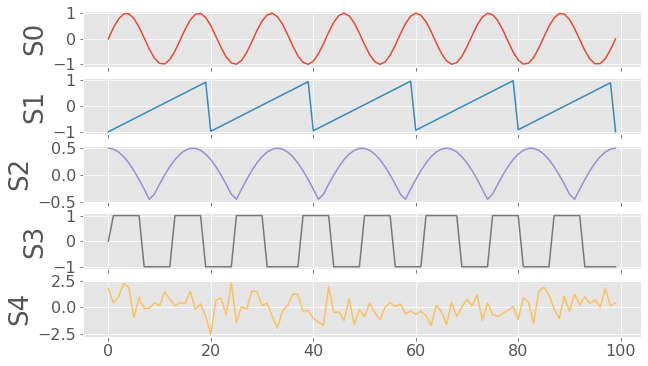

In [3]:
fig, ax, labels0 = plot_signals(time_series)
plt.show()

### Add noise and make 3 copies of each signal

In [4]:
SNR = 0.2
X0 = np.tile(S1, (R, 1)) + np.random.randn(R, N) * SNR 
X1 = np.tile(S2, (R, 1)) + np.random.randn(R, N) * SNR 
X2 = np.tile(S3, (R, 1)) + np.random.randn(R, N) * SNR 
X3 = np.tile(S4, (R, 1)) + np.random.randn(R, N) * SNR 
X4 = np.tile(S5, (R, 1)) + np.random.randn(R, N) * SNR 
X = np.concatenate((X0, X1, X2, X3, X4))

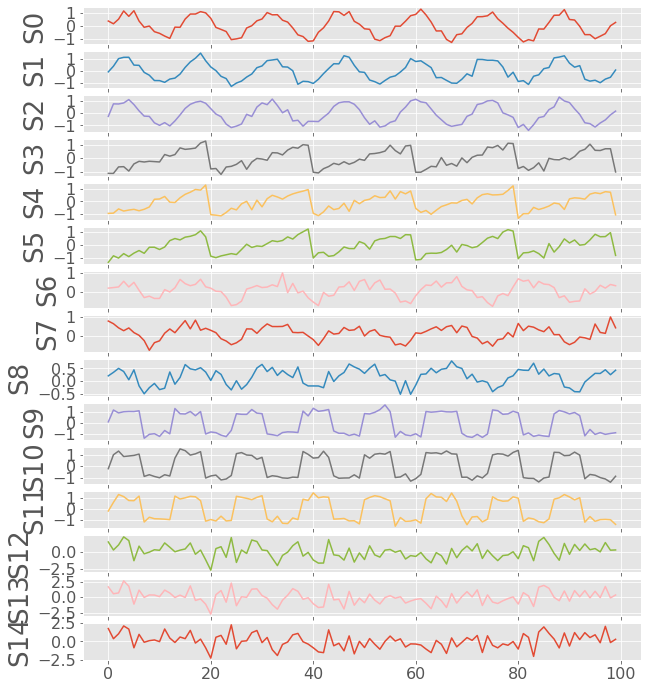

In [5]:
## instantiate the class
# dtw_cluster2 = dtw_clustering(X)
# dtw_cluster2.plot_signals(figsize=(10,12))
# plt.show()
fig, ax, labels_orig = plot_signals(X,figsize=(10,12))
plt.show()

Now, we have 15 signals in total. Let us also randomly make these signals distributed in geographical space by assigning them longitudes and latitudes. We assume that the signals with similar waveforms are geographically co-located. 

```
S0 variants (S0, S1, S2) -> xrange(0-3) yrange(7-10)
S1 variants (S3, S4, S5) -> xrange(1-4) yrange(3-5)
S2 variants (S6, S7, S8) -> xrange(4-8) yrange(4-6)
S3 variants (S9, S10, S11) -> xrange(5-10) yrange(0-4)
S4 variants (S12, S13, S14) -> xrange(5-9) yrange(6-9)
```

In [6]:
S0_lons = np.random.uniform(0, 3, 3)
S0_lats = np.random.uniform(7, 10, 3)

S1_lons = np.random.uniform(1, 4, 3)
S1_lats = np.random.uniform(3, 5, 3)

S2_lons = np.random.uniform(4, 8, 3)
S2_lats = np.random.uniform(4, 6, 3)

S3_lons = np.random.uniform(5, 10, 3)
S3_lats = np.random.uniform(0, 4, 3)

S3_lons = np.random.uniform(5, 10, 3)
S3_lats = np.random.uniform(0, 4, 3)

S4_lons = np.random.uniform(5, 9, 3)
S4_lats = np.random.uniform(6, 9, 3)

In [7]:
lons = np.concatenate((S0_lons, S1_lons, S2_lons, S3_lons, S4_lons))
lats = np.concatenate((S0_lats, S1_lats, S2_lats, S3_lats, S4_lats))

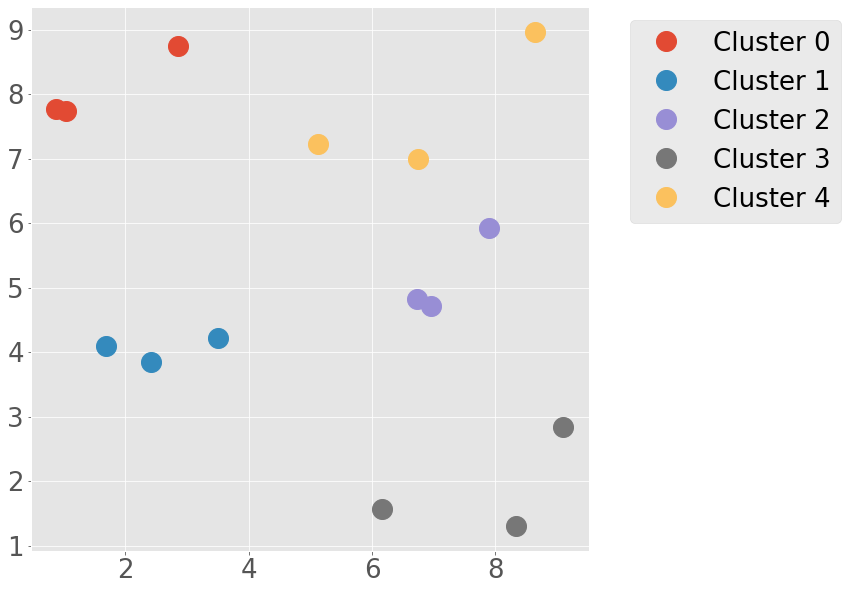

In [8]:
plot_cluster(lons,lats)
plt.show()

### Reshuffle the noisy signals
- to ensure that the algorithm don't remember the order

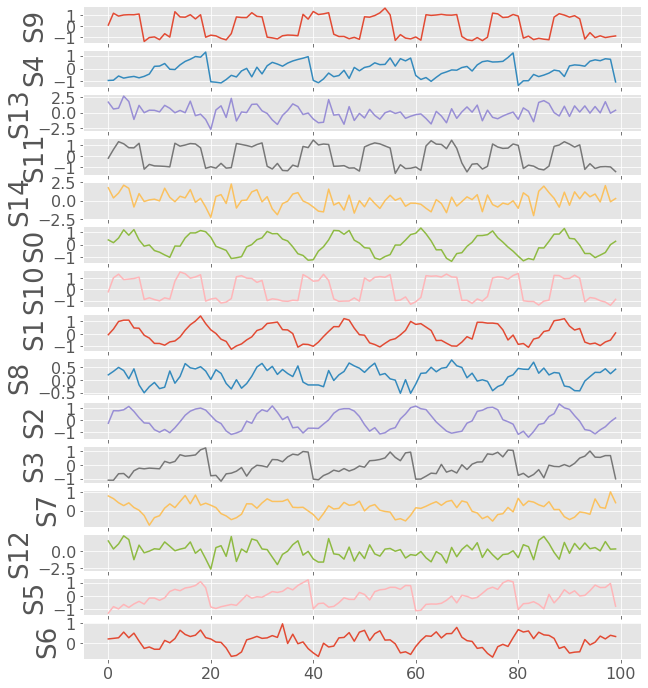

In [9]:
shuffled_idx, shuffled_matrix, fig, ax = shuffle_signals(X, labels=[], plot_signals=True, figsize=(10, 12))
shuffled_lons = lons[shuffled_idx]
shuffled_lats = lats[shuffled_idx]
plt.show()

### Reshuffled signal names

In [10]:
shuffled_idx

array([ 9,  4, 13, 11, 14,  0, 10,  1,  8,  2,  3,  7, 12,  5,  6])

In [11]:
# instantiate the class
dtw_cluster2 = dtw_clustering(shuffled_matrix, labels=labels_orig[shuffled_idx], longitudes=shuffled_lons, latitudes=shuffled_lats)

# dtw_cluster2 = dtw_clustering(X, labels=labels_orig, longitudes=lons, latitudes=lats)



In [12]:
## instantiate the class
dtw_cluster2.plot_dendrogram(annotate_above=3, max_d = 3,xlabel="Signals", figname="Figures/example_dtw_cluster.png")
plt.show()

The compiled dtaidistance C-OMP library is not available.
Use Python's multiprocessing library for parellelization (use_mp=True).
See the documentation for alternative installation options.
The compiled dtaidistance C-OMP library is not available.
Using the Python multiprocessing library instead (use_mp=True).
See the documentation for alternative installation options.



In the above dendrogram, we manually selected the threshold distance to be 3 to find the best clusters

[1, 2, 3, 4, 5]
[1, 2, 3, 4, 5]


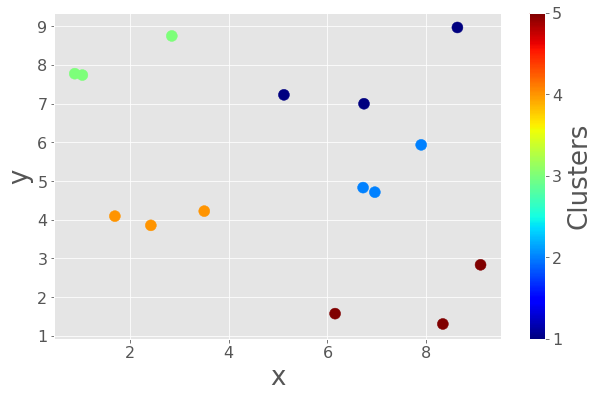

In [13]:
dtw_cluster2.plot_cluster_xymap(max_d=3, figname=None, xlabel='x', ylabel='y', figsize=(10, 6), fontsize=fontsize)
plt.show()

### plot only truncated dendrogram, which only shows the last truncate_p=5 out of our all merges

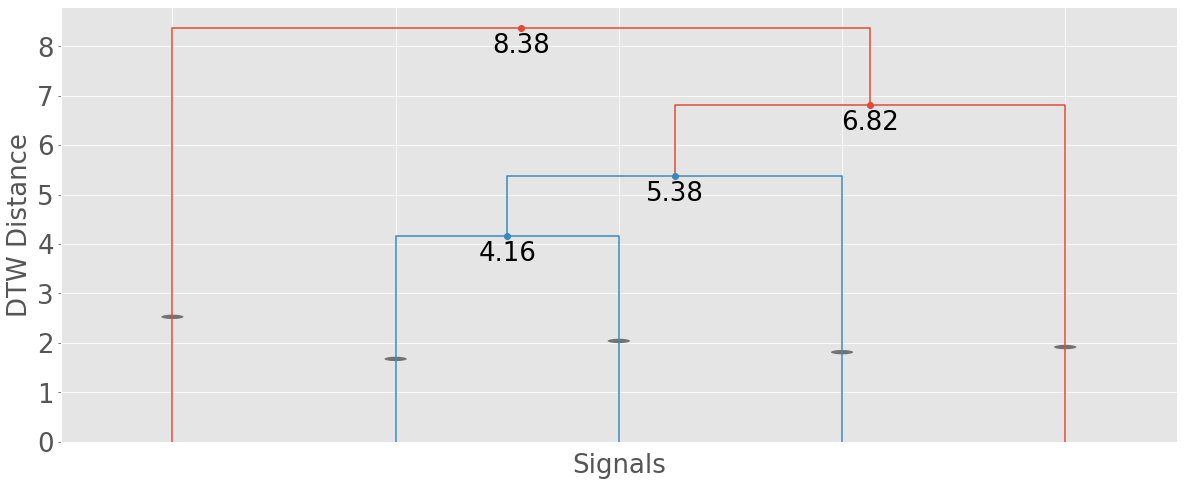

In [14]:
## instantiate the class
dtw_cluster2.plot_dendrogram(truncate_p=5,annotate_above=3,xlabel="Signals") 
plt.show()

### How the DTW distance changes with iterations to obtain the dendrogram

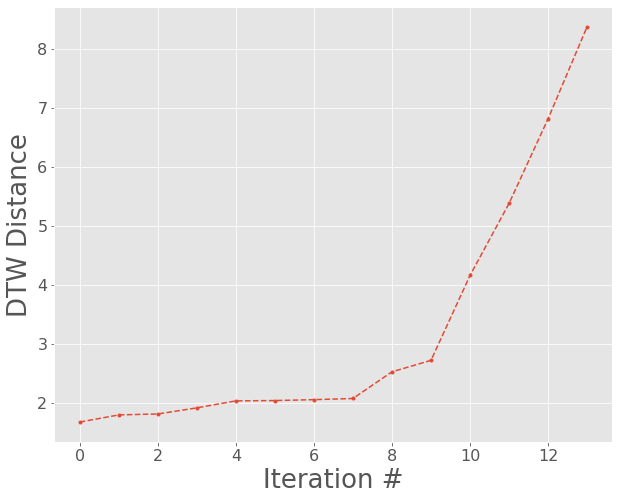

In [15]:
dtw_cluster2.plot_hac_iteration()
plt.show()

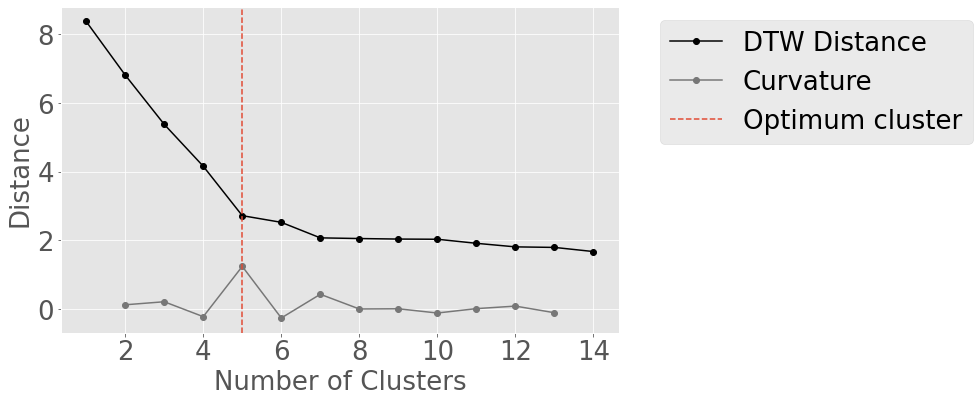

In [16]:
dtw_cluster2.plot_optimum_cluster()
plt.show()


In [17]:


def compute_linkage(model):
    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)
    return linkage_matrix

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    linkage_matrix = compute_linkage(model)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

In [18]:
#‘ward’ minimizes the variance of the clusters being merged
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None, affinity='euclidean',linkage='ward')

model = model.fit(X)

plt.figure(figsize=(20, 8))
# plot the top three levels of the dendrogram
plot_dendrogram(model, p=5, color_threshold=5)
plt.xticks(fontsize=26)
plt.yticks(fontsize=26)
plt.axhline(y=5, c='k')


plt.xlabel("Signal Indexes")
plt.savefig('Figures/example_euclidean_cluster.pdf',bbox_inches='tight')
plt.close()

In [19]:
import ipyplot

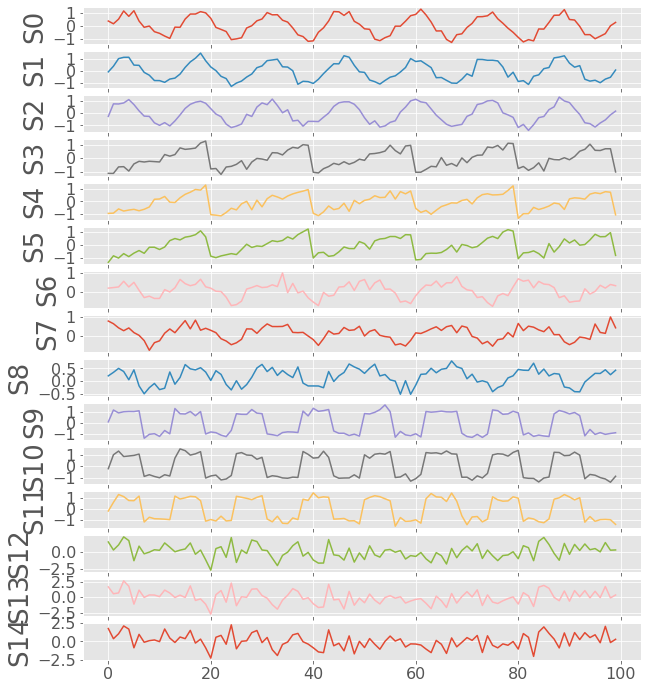

In [20]:
fig, ax, labels_orig = plot_signals(X,figsize=(10,12))
plt.show()

In [21]:
ipyplot.plot_images(['Figures/example_dtw_cluster.pdf','Figures/example_euclidean_cluster.pdf'], ['DTW','Euclidean'], img_width=450)

Both Euclidean and DTW based clustering results are similar. However, we can see some obvious differences. Let us list some of the similarity and differences for the above example.
1. Both the results found 5 significant clusters.
1. Both Euclidean and DTW based HAC found that the random function based time series (12, 13, 14) are most dissimilar
1. The two closest clusters with DTW is sawtooth (6,7,8) and sine func(0,1,2). While that with the Euclidean, it is abs_cosine (6,7,8) and sawtooth fn (3,4,5)

The two results are similar because the signals considered for this example are stationary in nature. 

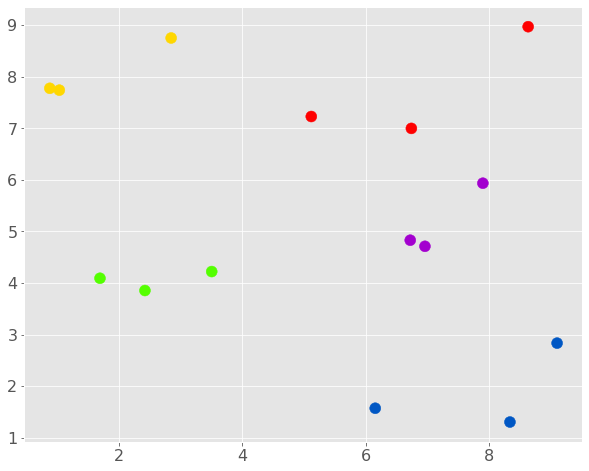

In [22]:
max_d = 5
Z1= compute_linkage(model)
clusters = fcluster(Z1, max_d, criterion='distance')

plt.figure(figsize=(10, 8))
plt.scatter(lons, lats, c=clusters, cmap='prism', s=120)  # plot points with cluster dependent colors
plt.show()